In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
from ultralytics import YOLO

In [8]:
model = YOLO("final.pt")

In [10]:
!yolo task=detect mode=predict conf=0.25 save=True \
model=final.pt \
source= test1.jpg

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [13]:
import cv2
image_files = [f"test{i}.jpg" for i in range(1, 6)]

for image_file in image_files:
    !yolo task=detect mode=predict conf=0.25 save=True model=final.pt source={image_file}

    output_folder = "runs/detect/exp"
    output_image = f"{output_folder}/{image_file}"

    predicted_image = cv2.imread(output_image)
    if predicted_image is not None:
        cv2.imshow(f"Tahmin Sonucu: {image_file}", predicted_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print(f"Çıkış görüntüsü bulunamadı: {output_image}")


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

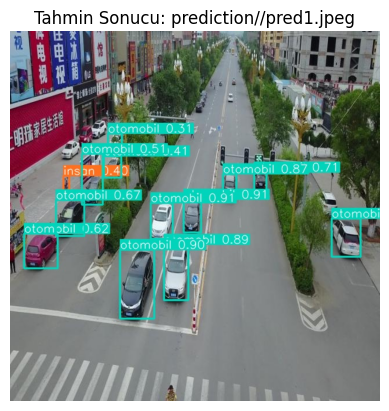

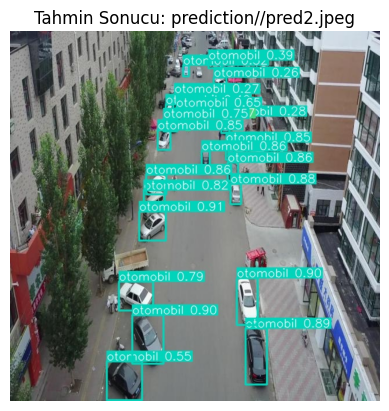

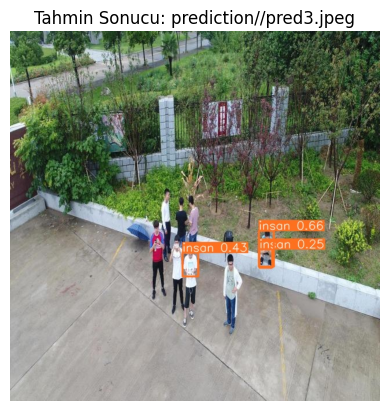

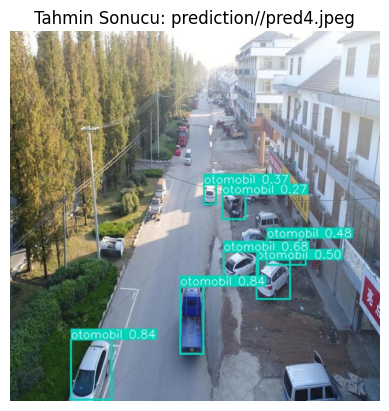

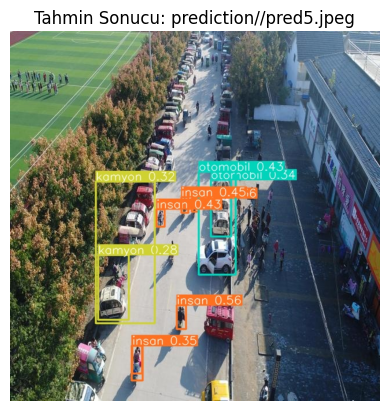

In [9]:
import cv2
import matplotlib.pyplot as plt

predict_folder = "prediction/"
image_files = [f"{predict_folder}/pred{i}.jpeg" for i in range(1, 6)]

for image_file in image_files:
    
    predicted_image = cv2.imread(image_file)
    
    if predicted_image is not None:
        
        predicted_image = cv2.cvtColor(predicted_image, cv2.COLOR_BGR2RGB)
        

        plt.figure()
        plt.imshow(predicted_image)
        plt.title(f"Tahmin Sonucu: {image_file}")
        plt.axis("off")  
        plt.show()
    else:
        print(f"Görüntü yüklenemedi: {image_file}")
